In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0



                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/noarch         [>                   ] (--:--) No change
pkgs/main/noarch

In [42]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [33]:
tesla = yf.Ticker("TSLA")
tesla_data = tsla.history(period = "max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
data  = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
tesla_revenue = pd.DataFrame(columns=["Year", "Revenue"])
table = soup.find("table",{"class":"historical_data_table table"})
table_body = table.find("tbody")
for row in table_body.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    rev = col[1].text
    tesla_revenue = tesla_revenue.append({"Year":date, "Revenue":rev}, ignore_index=True)




In [39]:

tesla_revenue.dropna(inplace=True)

tesla_revenue.head()

,Year,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


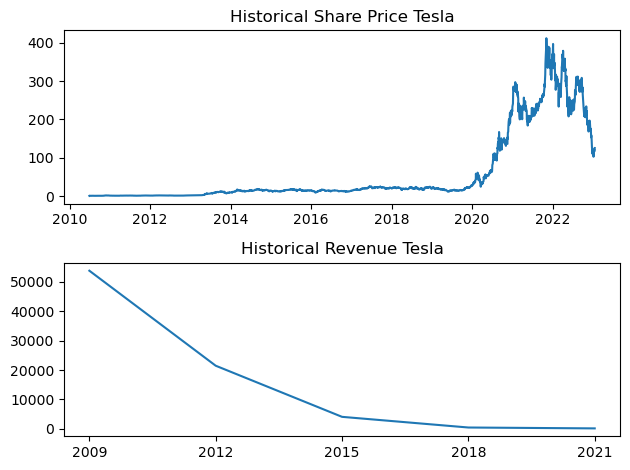

In [43]:
def make_graph(stock_data, revenue_data, stock):
    figure, axis = plt.subplots(2, 1)
    
    x_stock = stock_data["Date"]
    y_stock = stock_data["Open"]
    axis[0].plot(x_stock, y_stock)
    axis[0].set_title("Historical Share Price "+stock )
    
    x_rev = revenue_data["Year"][::-3]
    y_rev = revenue_data["Revenue"]
    i=0
    for pri in y_rev:
        y_rev[i] = pri.replace(',','')
        y_rev[i] = y_rev[i].replace('$','')
        y_rev[i] = int(y_rev[i])
        i = i+1
    axis[1].plot(x_rev, y_rev[::3])
    axis[1].set_title("Historical Revenue "+stock)
    
    figure.tight_layout()
    plt.show()
    
make_graph(tesla_data, tesla_revenue, "Tesla")

In [44]:
gme = yf.Ticker("GME")
gme_data= gme.history(period = "max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [45]:
gme_revenue = pd.DataFrame(columns=["Year", "Revenue"])
table = soup.find("table",{"class":"historical_data_table table"})
table_body = table.find("tbody")
for row in table_body.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    rev = col[1].text
    gme_revenue = gme_revenue.append({"Year":date, "Revenue":rev}, ignore_index=True)
gme_revenue.head()

,Year,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


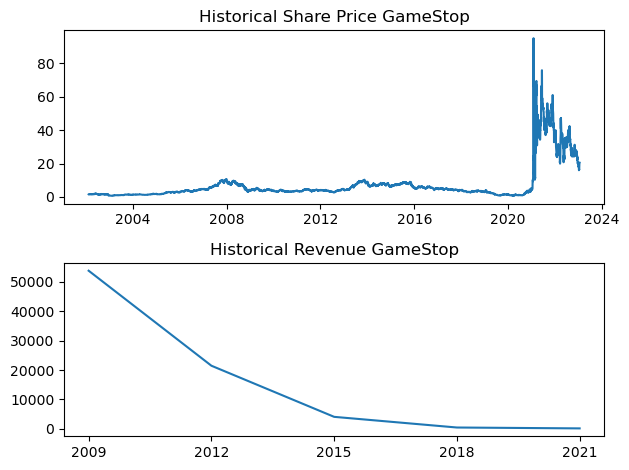

In [46]:
make_graph(gme_data, gme_revenue, "GameStop")